In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [53]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.shape

(7043, 21)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [58]:
df.drop('customerID',axis=1,inplace=True)

In [59]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,gender,object,2,0,"[Male, Female]",22
1,SeniorCitizen,int64,2,0,"[0, 1]",22
2,Partner,object,2,0,"[No, Yes]",22
3,Dependents,object,2,0,"[No, Yes]",22
4,tenure,int64,73,0,"[1, 72, 2, 3, 4, 71, 5, 7, 8, 9]",22
5,PhoneService,object,2,0,"[Yes, No]",22
6,MultipleLines,object,3,0,"[No, Yes, No phone service]",22
7,InternetService,object,3,0,"[Fiber optic, DSL, No]",22
8,OnlineSecurity,object,3,0,"[No, Yes, No internet service]",22
9,OnlineBackup,object,3,0,"[No, Yes, No internet service]",22


In [60]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [63]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

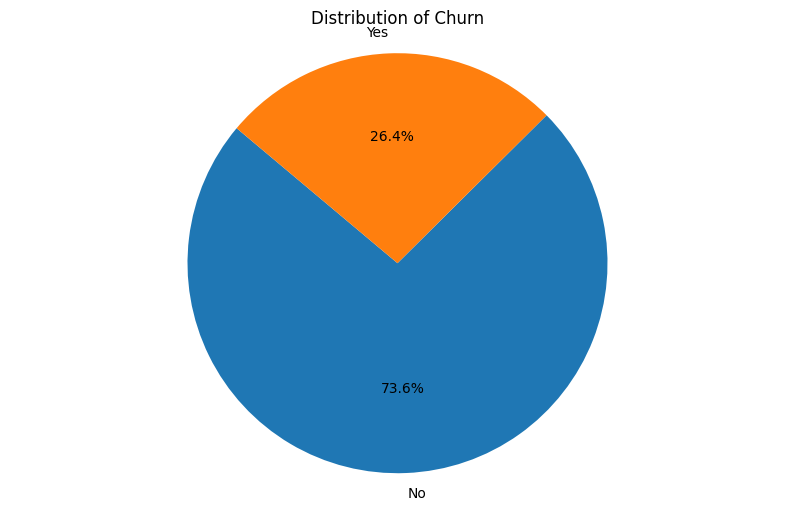

In [65]:
churn_counts = df['Churn'].value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Column 'tenure' is not categorical.
Column 'MonthlyCharges' is not categorical.
Column 'TotalCharges' is not categorical.


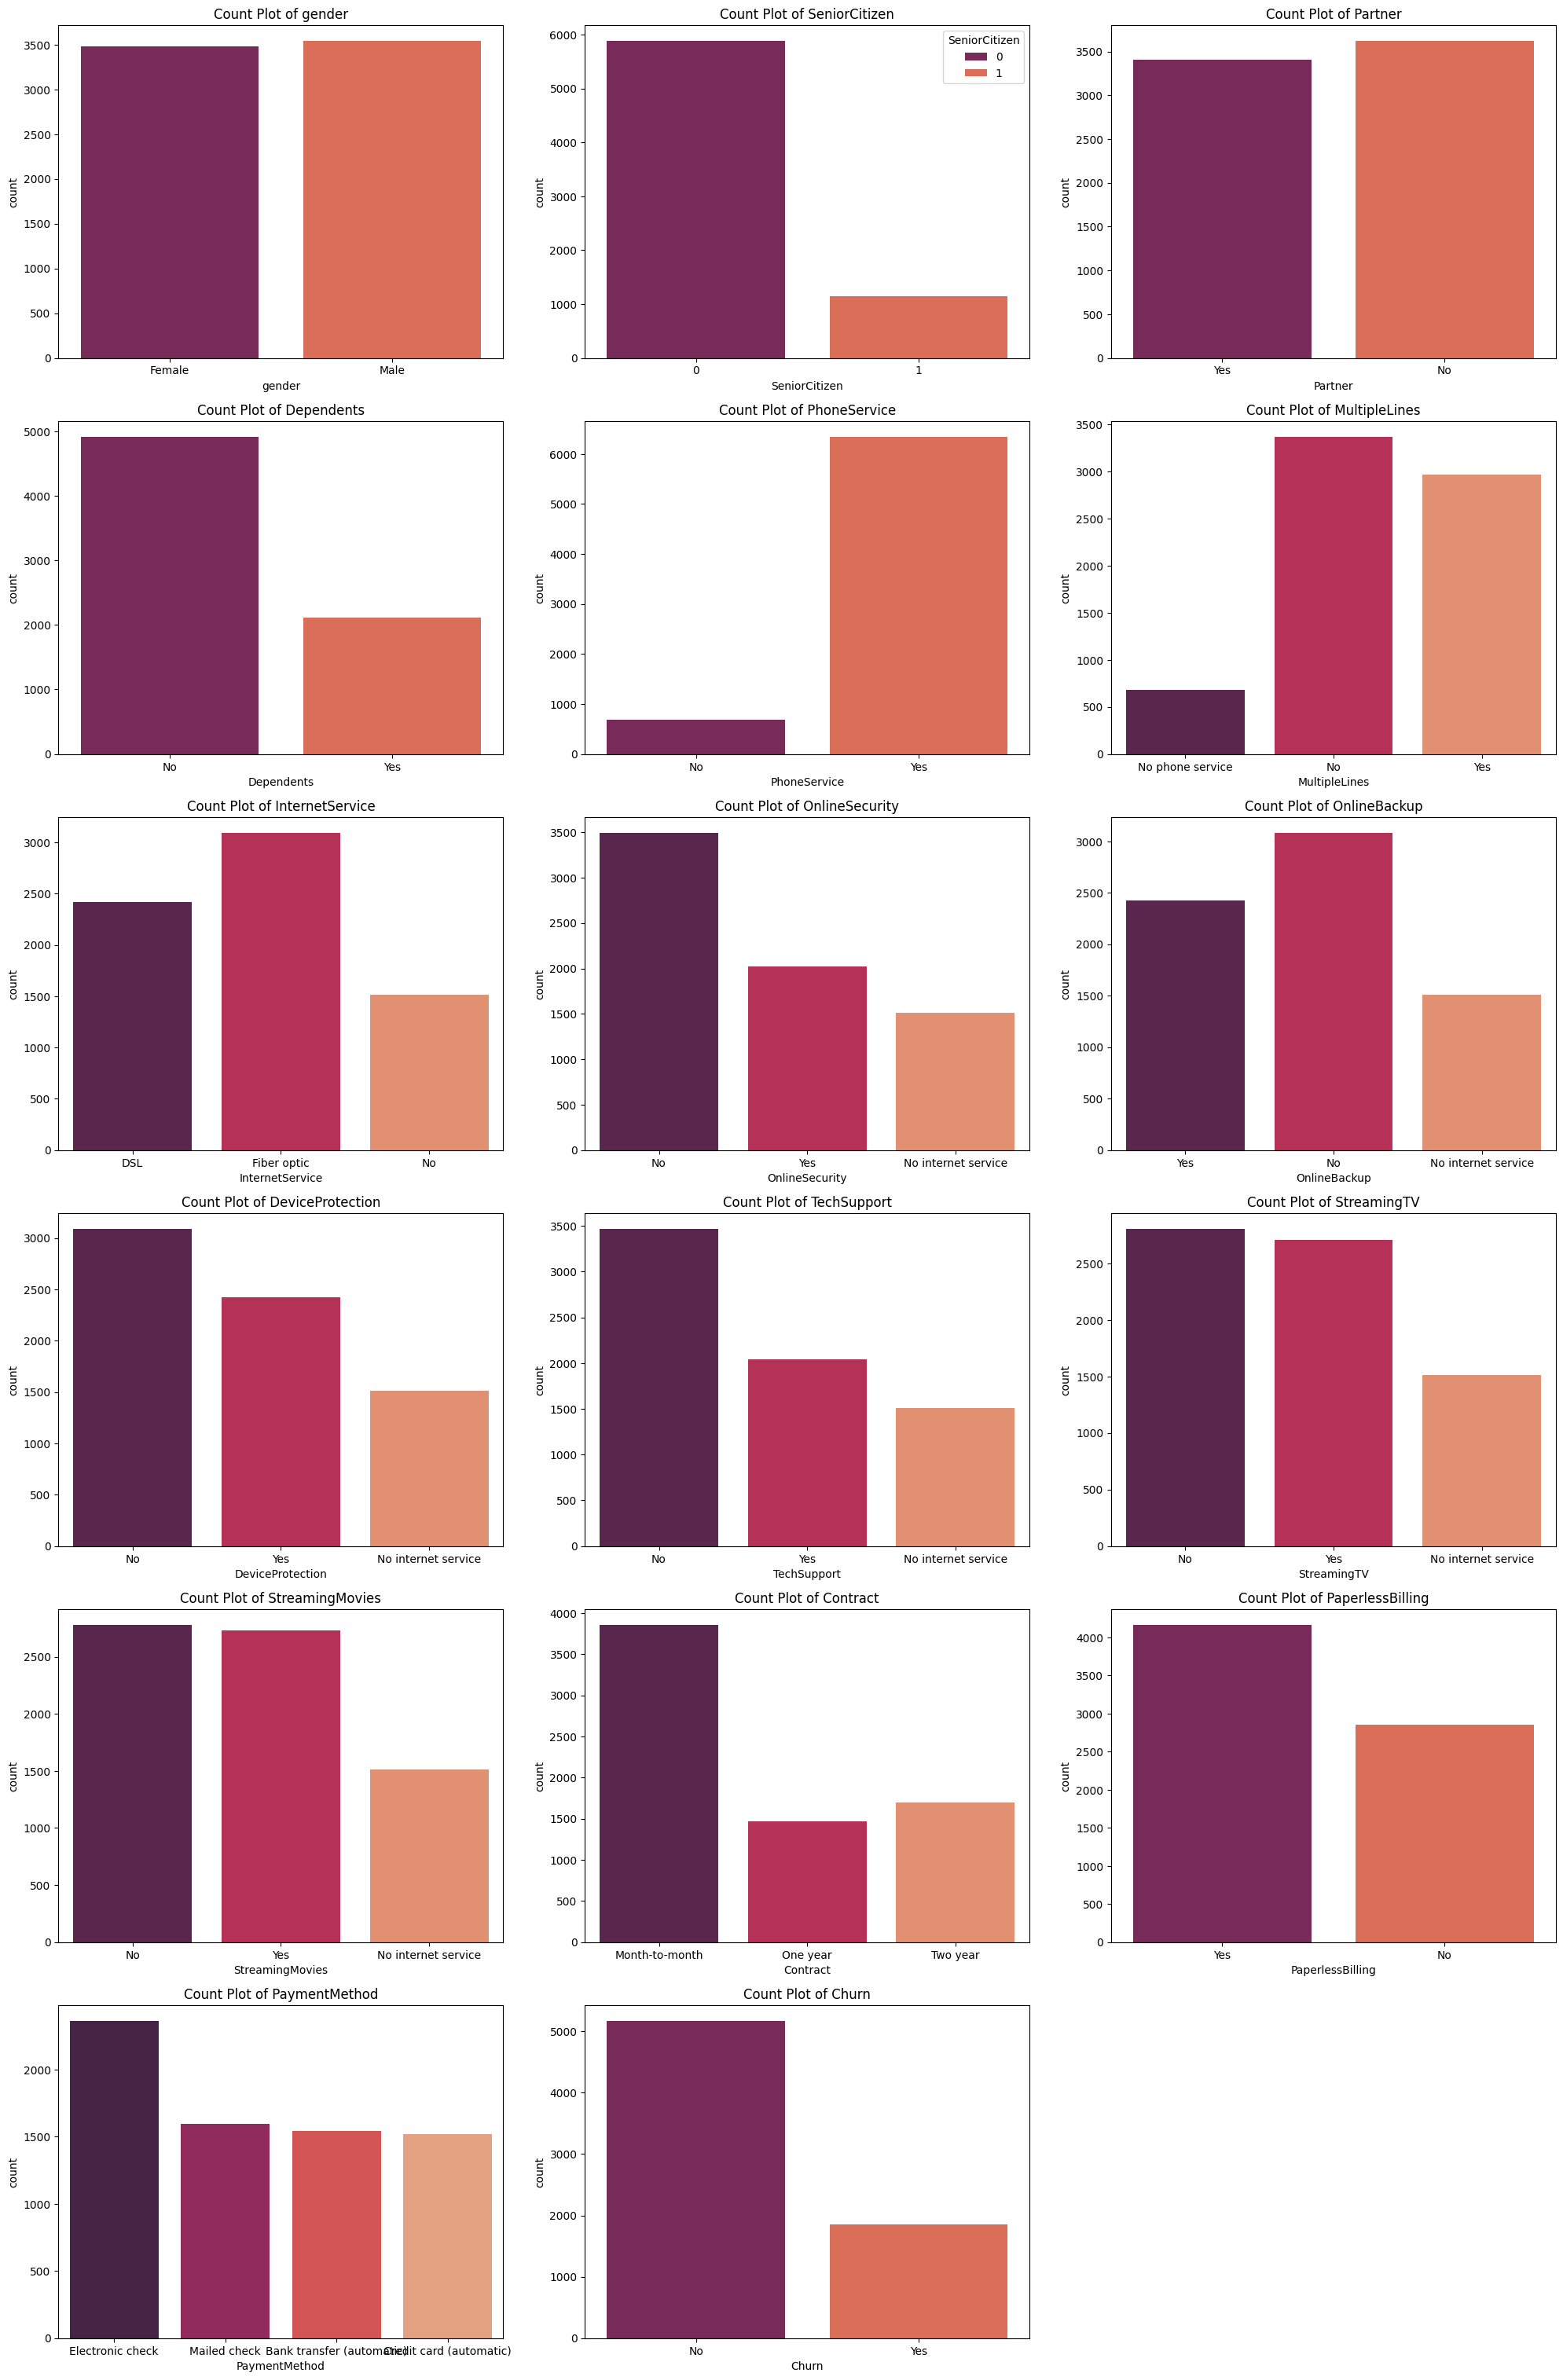

In [66]:
cleaner.categorical_plot(df,df.columns,5)

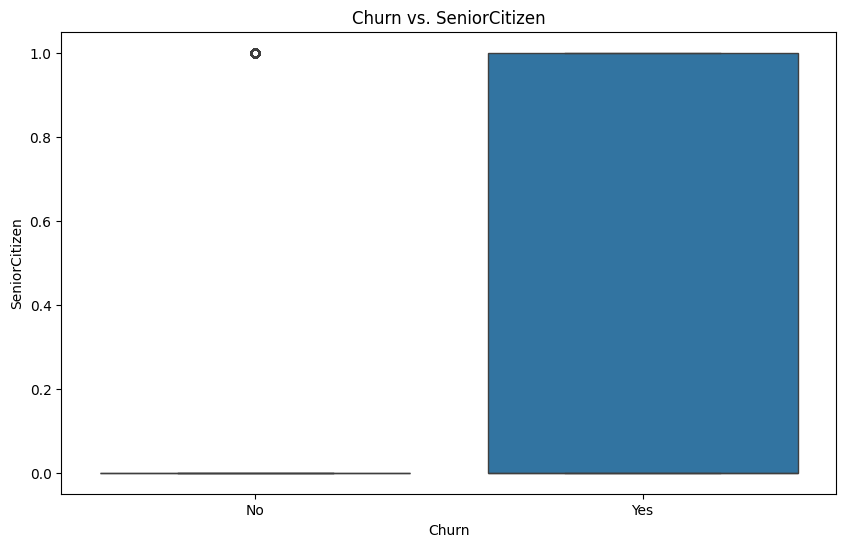

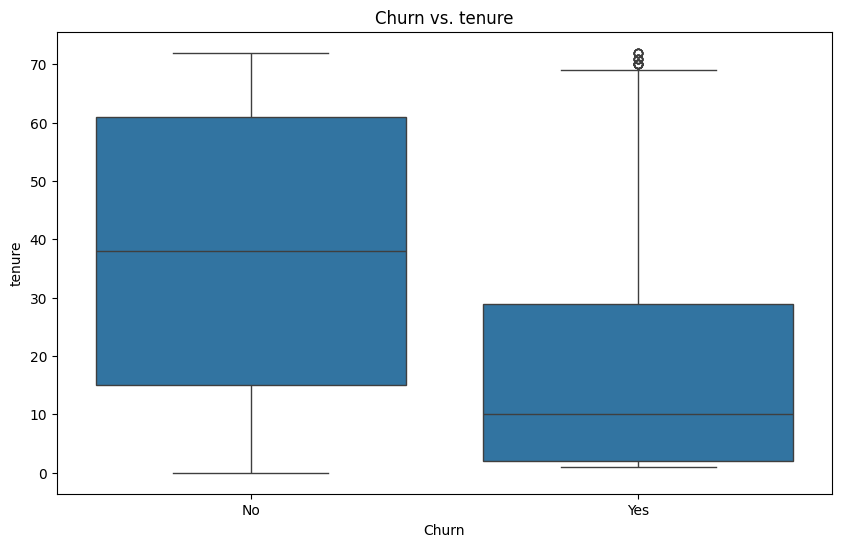

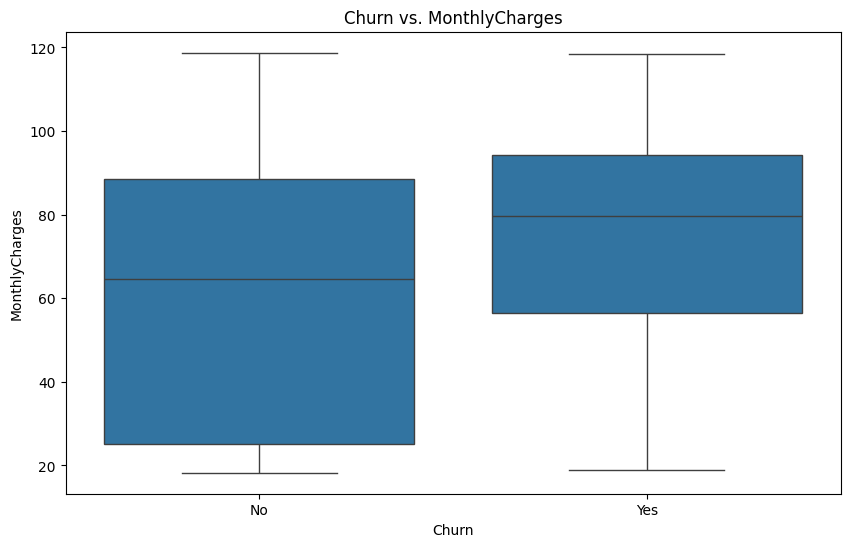

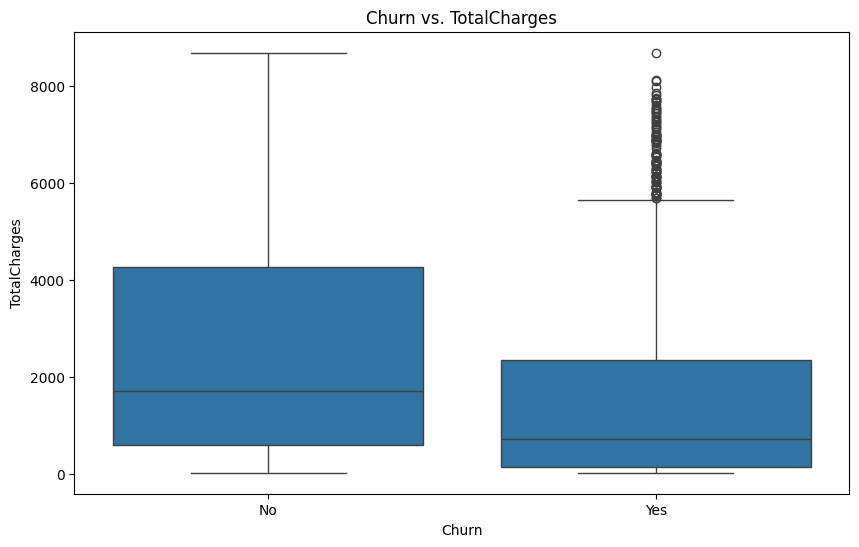

In [67]:
# List of features to analyze
numerical_features =df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
# Bivariate Analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn vs. {feature}')
    plt.show()

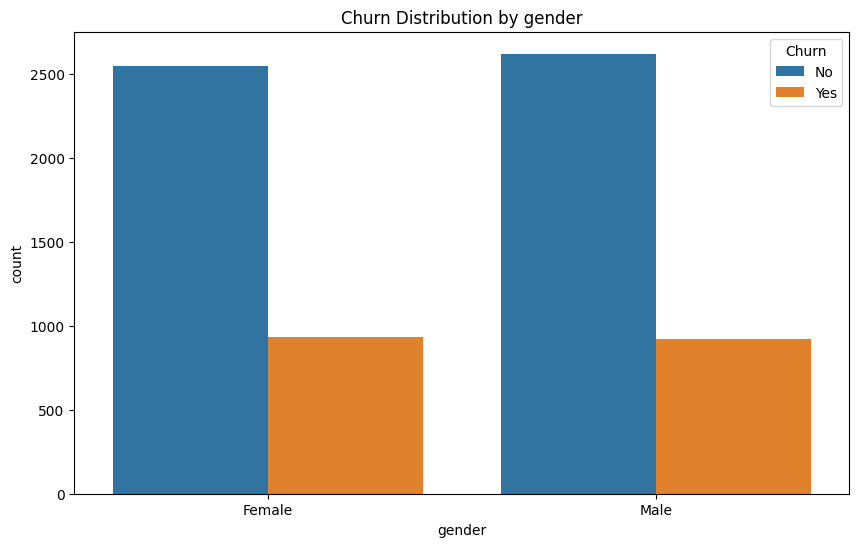

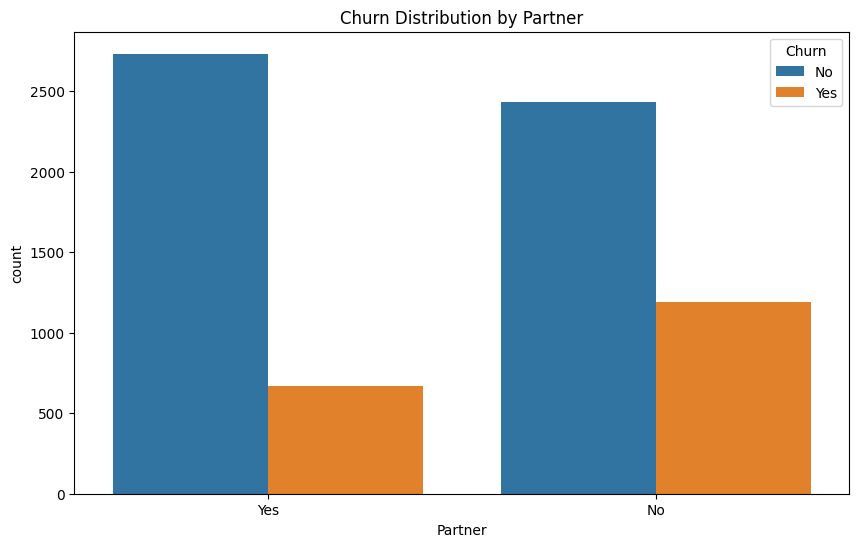

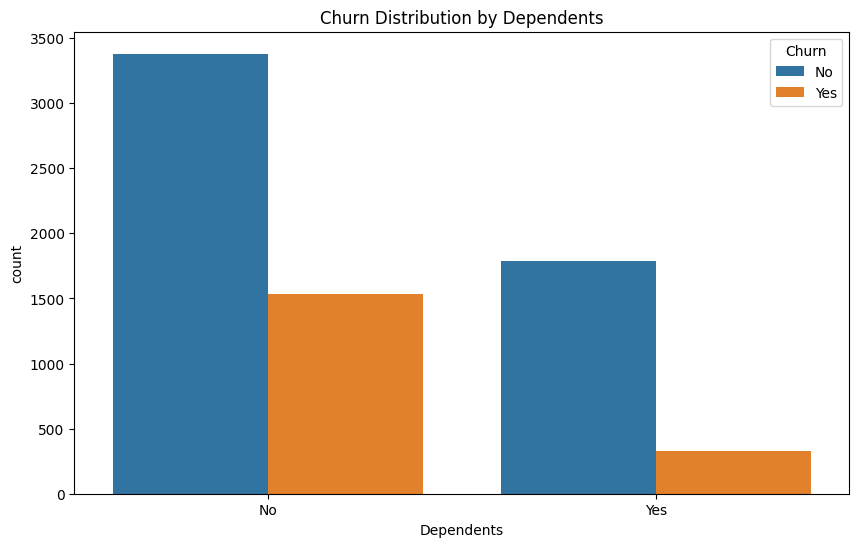

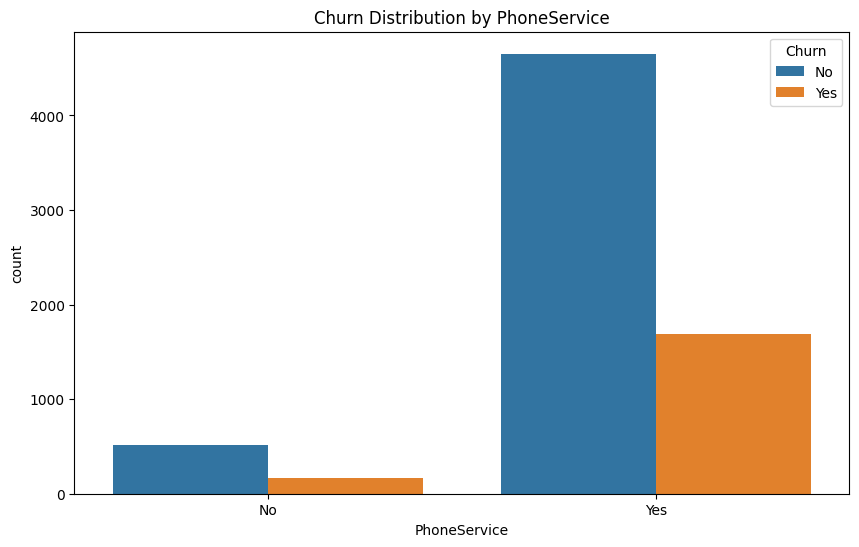

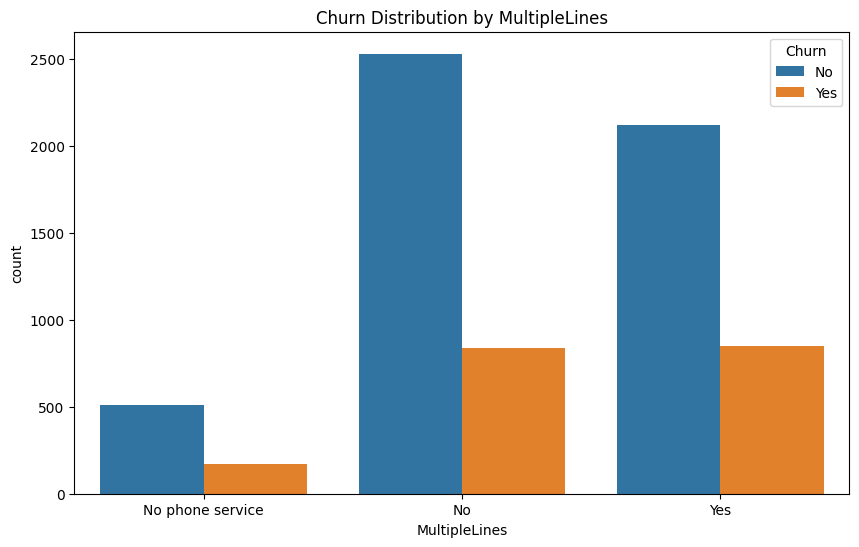

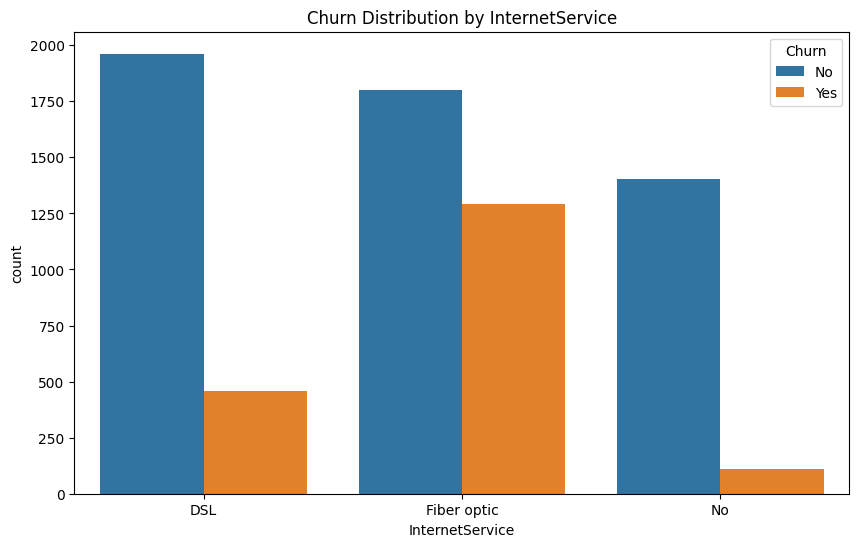

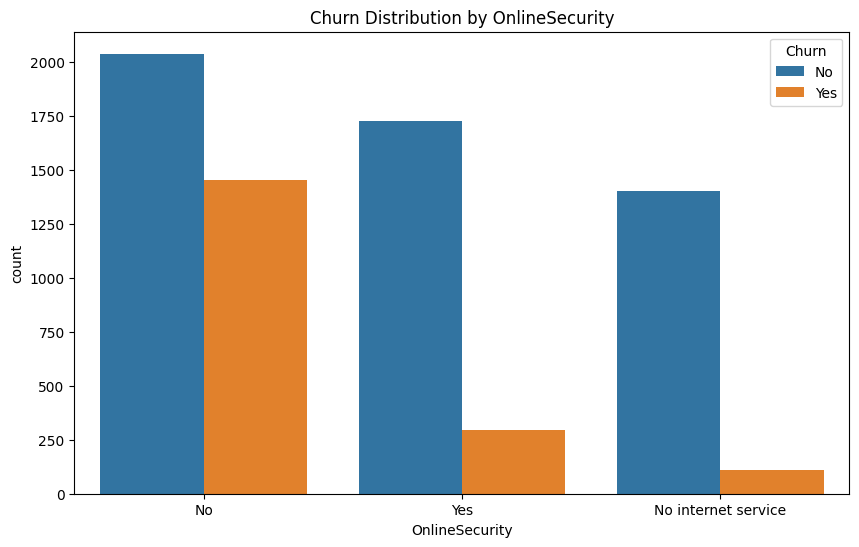

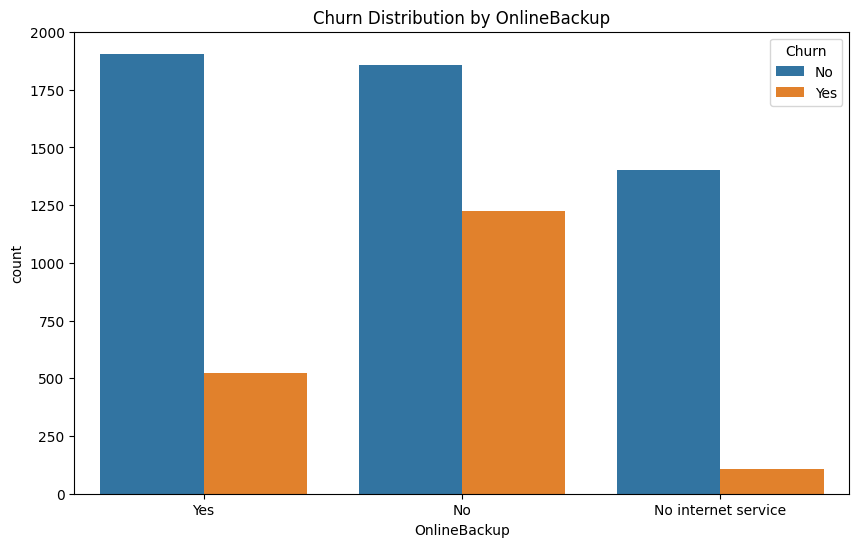

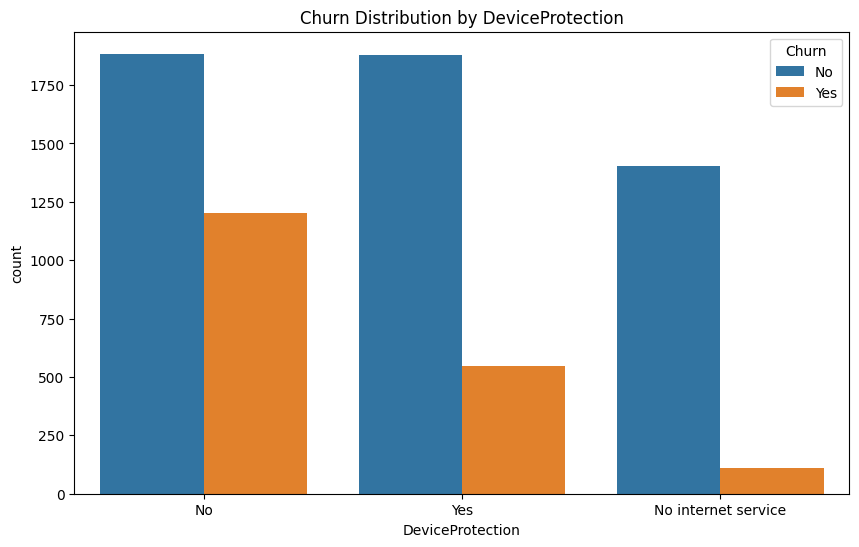

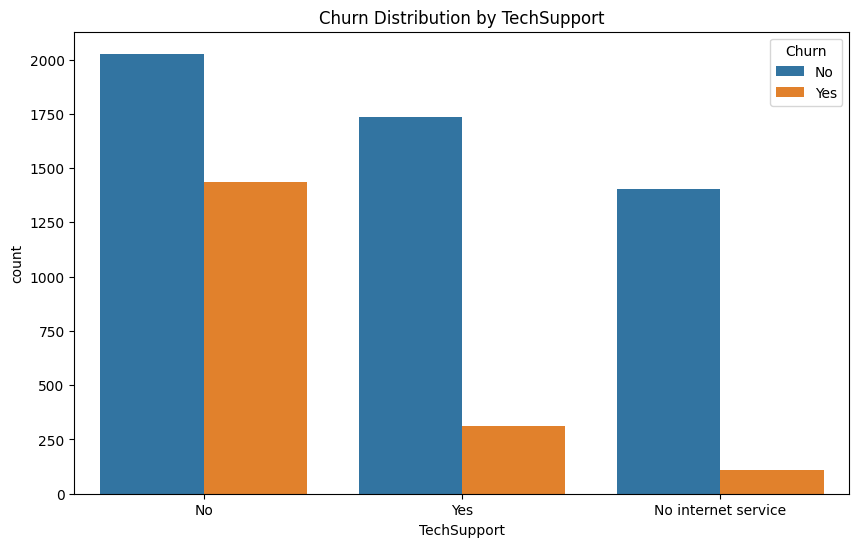

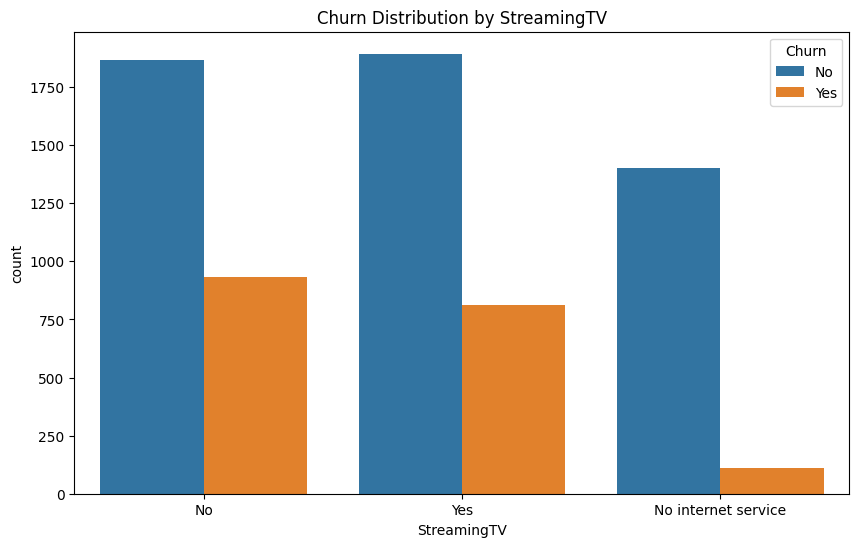

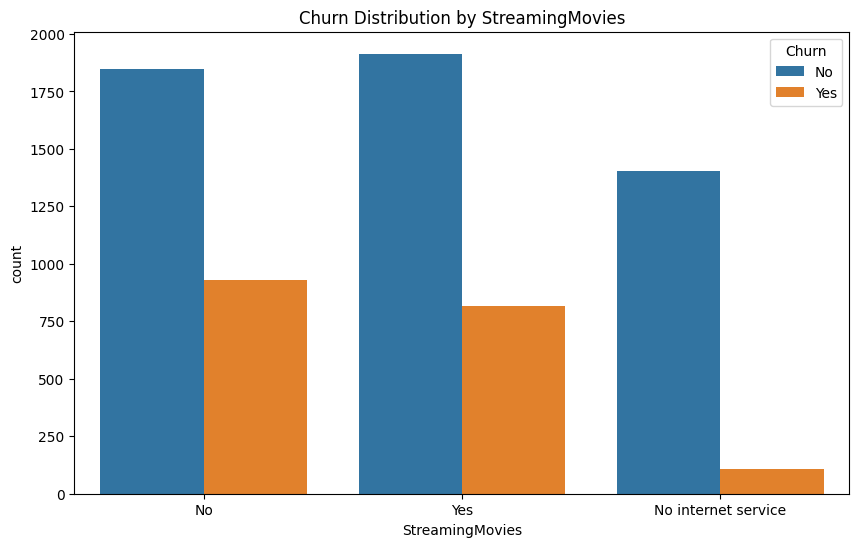

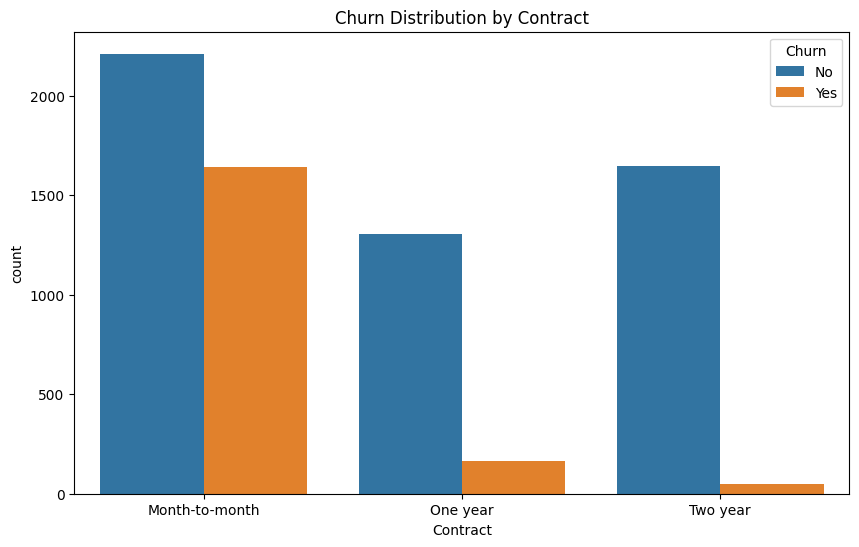

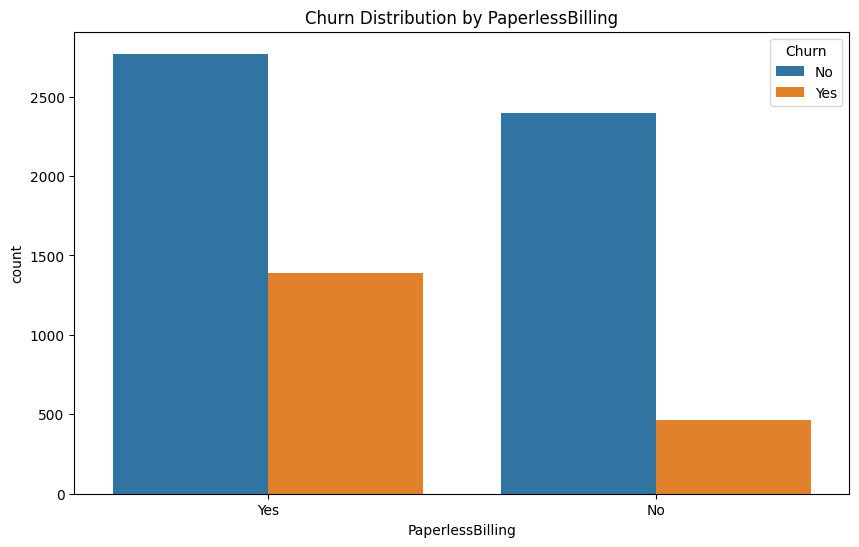

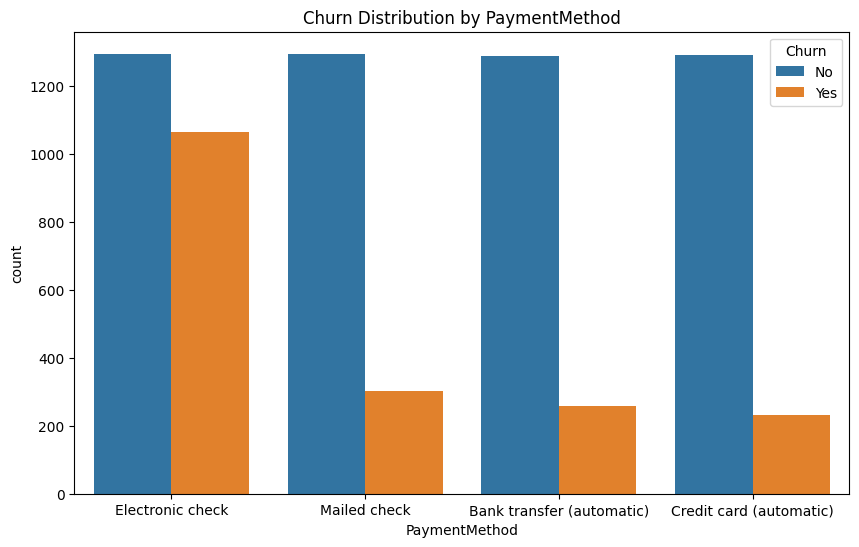

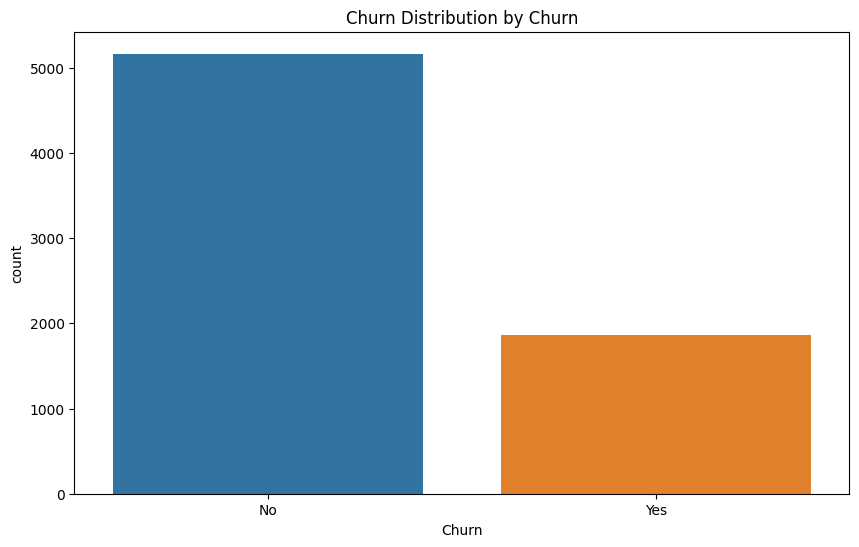

In [68]:
# Bivariate Analysis for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Distribution by {feature}')
    plt.show()

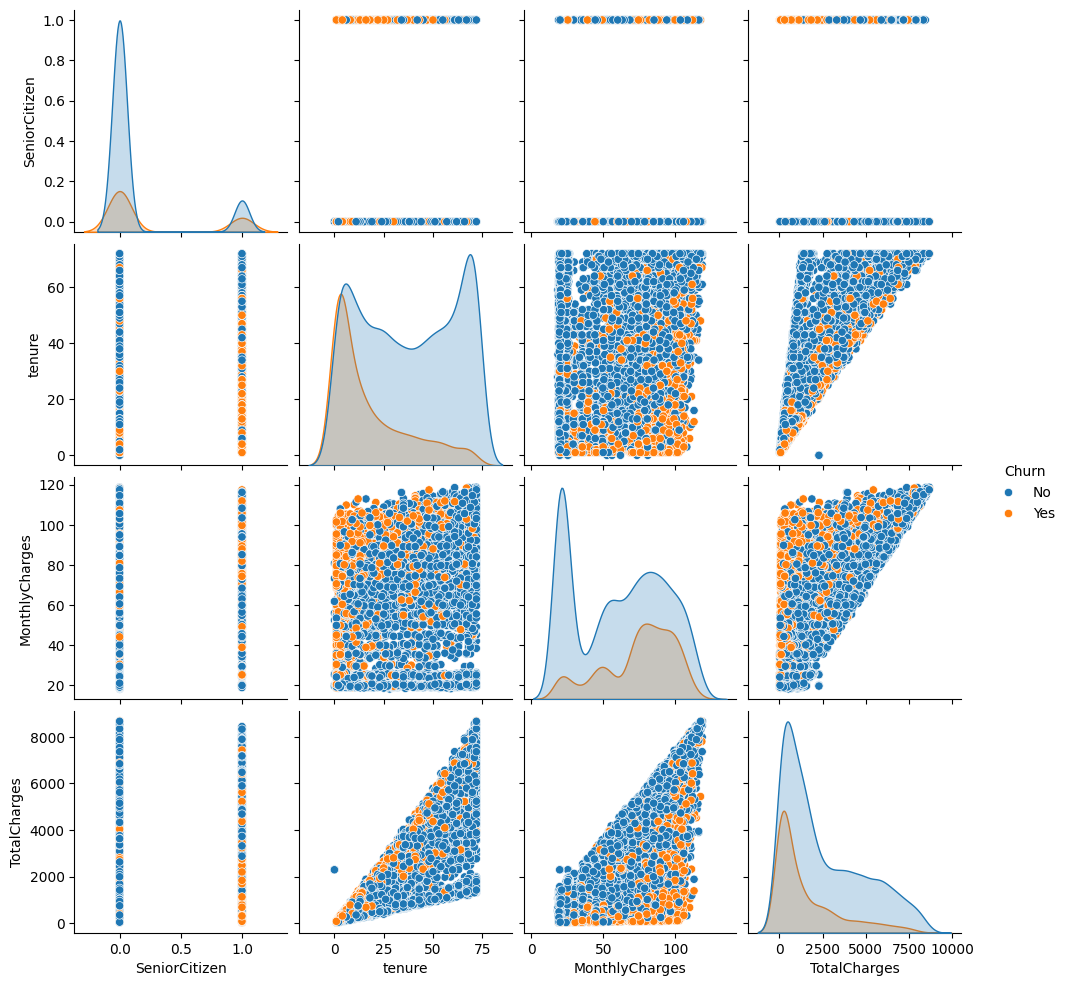

In [69]:
sns.pairplot(df, hue='Churn')
plt.show()

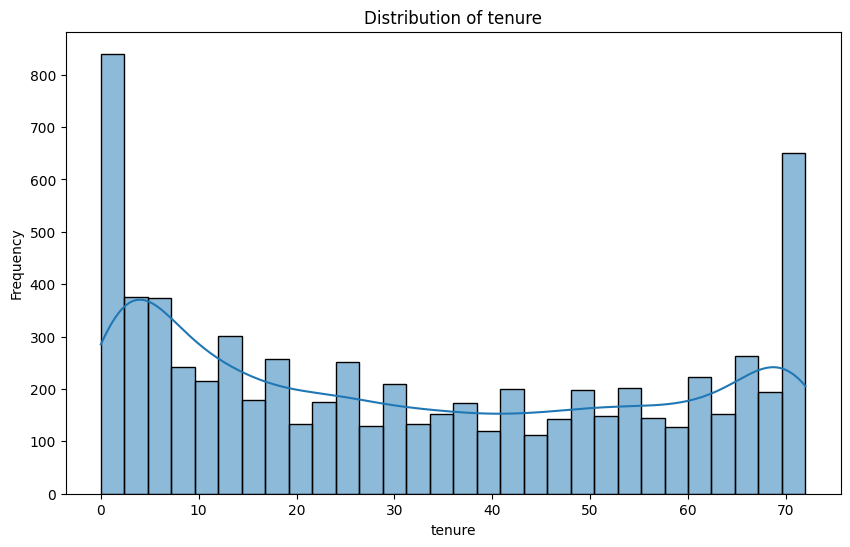

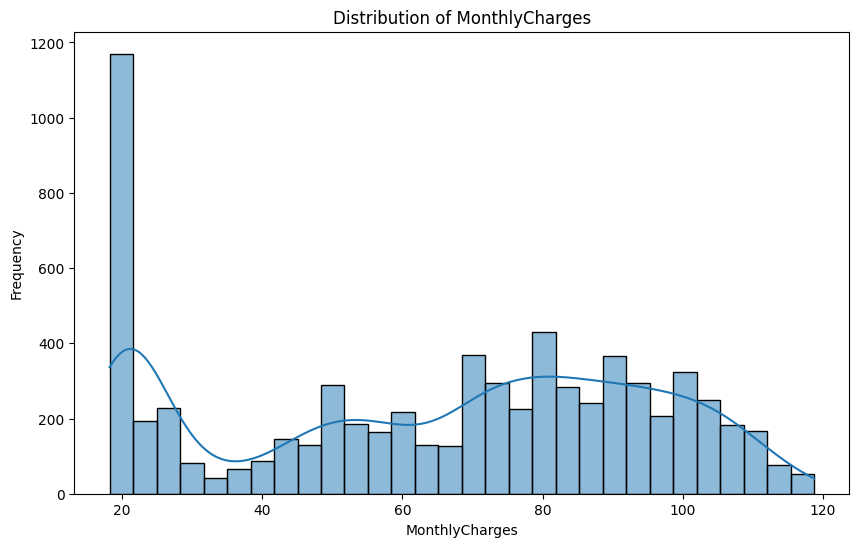

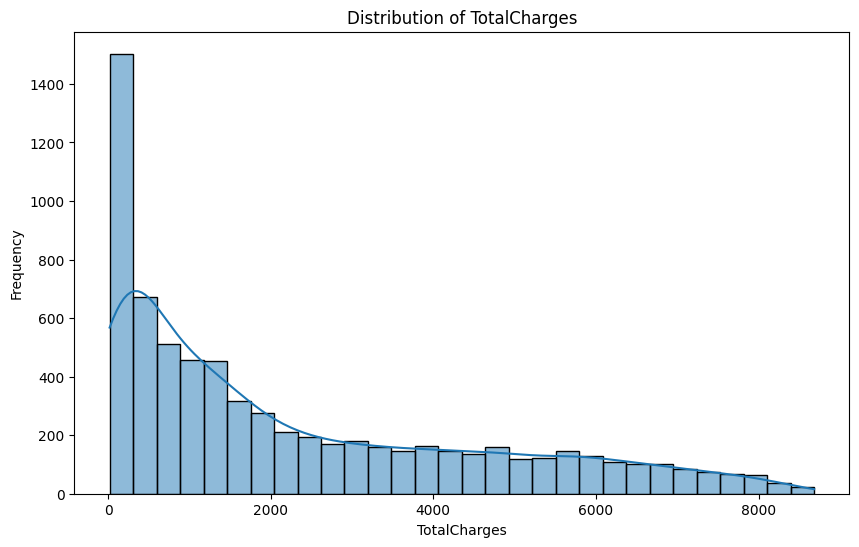

In [70]:
# Distribution of Numerical Features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


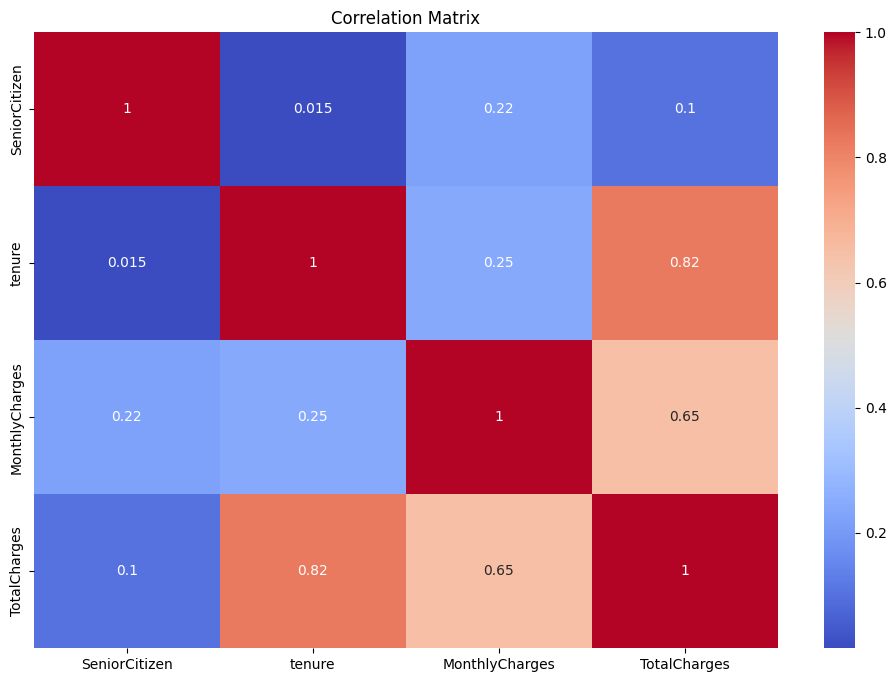

In [71]:
# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation analysis
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [72]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [73]:
# Identify all categorical features in the dataset
categorical_features = df.select_dtypes(include=['object']).columns

# Create dummy variables for all categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True,dtype=int)

# Display the first few rows of the updated dataset
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [74]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [75]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101, stratify=y_temp)

In [76]:
from imblearn.combine import SMOTETomek

In [77]:
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)


In [78]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
# Apply scaling on training data
# Apply scaling on training data
X_train_res.loc[:, columns_to_scale] = scaler.fit_transform(X_train_res[columns_to_scale])
# Apply the same scaling on validation and testing data
X_val.loc[:, columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test.loc[:, columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [79]:
param_distributions = {
    'Logistic Regression': {'C': np.logspace(-4, 4, 20)},
    'Random Forest': {'n_estimators': np.arange(10, 200, 10), 'max_depth': np.arange(1, 20, 2)},
    'Support Vector Machine': {'C': np.logspace(-4, 4, 20), 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': np.arange(1, 31, 2)},
    'Decision Tree': {'max_depth': np.arange(1, 20, 2)},
    'Naive Bayes': {},  # No hyperparameters to tune for GaussianNB
    'Gradient Boosting': {'n_estimators': np.arange(10, 200, 10), 'learning_rate': np.logspace(-4, 0, 20)},
    'AdaBoost': {'n_estimators': np.arange(10, 200, 10)},
    'XGBoost': {'n_estimators': np.arange(10, 200, 10), 'learning_rate': np.logspace(-4, 0, 20)}
}

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA


In [81]:
# Apply PCA after scaling
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_res_pca = pca.fit_transform(X_train_res)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [82]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')  # Set eval_metric to avoid warnings
}

In [83]:
best_model = None
best_accuracy = 0
best_model_name = ""

In [84]:
# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

--- Logistic Regression ---
Best Parameters: {'C': np.float64(1.623776739188721)}
Validation Accuracy: 0.7628205128205128
--- Random Forest ---
Best Parameters: {'n_estimators': np.int64(100), 'max_depth': np.int64(11)}
Validation Accuracy: 0.7720797720797721
--- Support Vector Machine ---
Best Parameters: {'kernel': 'rbf', 'C': np.float64(11.288378916846883)}
Validation Accuracy: 0.7592592592592593
--- K-Nearest Neighbors ---
Best Parameters: {'n_neighbors': np.int64(13)}
Validation Accuracy: 0.7243589743589743
--- Decision Tree ---
Best Parameters: {'max_depth': np.int64(5)}
Validation Accuracy: 0.7521367521367521
--- Naive Bayes ---
Best Parameters: Default parameters
Validation Accuracy: 0.7685185185185185
--- Gradient Boosting ---
Best Parameters: {'n_estimators': np.int64(80), 'learning_rate': np.float64(0.23357214690901212)}
Validation Accuracy: 0.7535612535612536
--- AdaBoost ---
Best Parameters: {'n_estimators': np.int64(120)}
Validation Accuracy: 0.7542735042735043
--- XGBoos

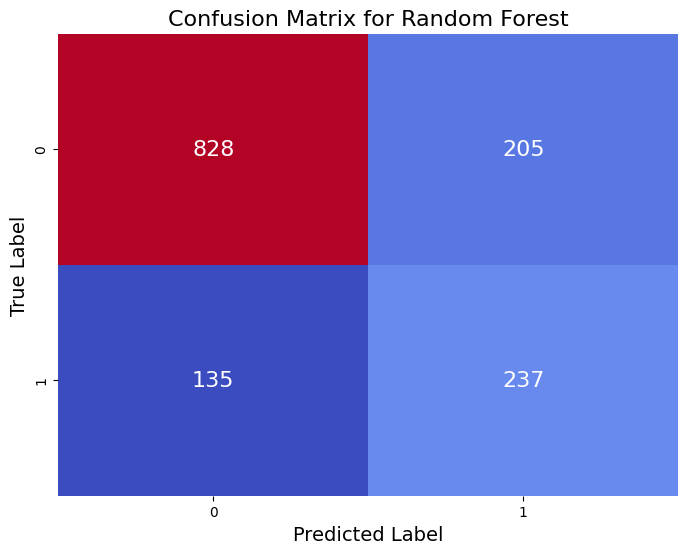

In [86]:
for model_name, model in classifiers.items():
    if param_distributions[model_name]:
        # Setup RandomizedSearchCV using the training set
        search = RandomizedSearchCV(model, param_distributions[model_name], n_iter=50, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
        search.fit(X_train_res_pca, y_train_res)  # Use resampled PCA-transformed training data
        best_params = search.best_params_
        current_model = search.best_estimator_
        
        # Evaluate on the validation set using the best model found
        y_val_pred = current_model.predict(X_val_pca)  # Ensure that PCA transformation is applied to X_val similar to X_train_res_pca
        val_accuracy = accuracy_score(y_val, y_val_pred)
        
        # Compare to find the best model based on validation set performance
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model_name = model_name
            best_model = current_model
    
    else:
        # If no hyperparameters to tune, use the default model
        current_model = model.fit(X_train_res_pca, y_train_res)
        best_params = "Default parameters"
        y_val_pred = current_model.predict(X_val_pca)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model_name = model_name
            best_model = current_model

    print(f'--- {model_name} ---')
    print('Best Parameters:', best_params)
    print('Validation Accuracy:', val_accuracy)

# Final evaluation on the test set with the best model
y_test_pred = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"The best model is {best_model_name} with a validation accuracy of {best_accuracy}.")
print('Test Accuracy:', test_accuracy)

# Detailed metrics and plots
print('Precision:', precision_score(y_test, y_test_pred, average='binary'))
print('Recall:', recall_score(y_test, y_test_pred, average='binary'))
print('F1 Score:', f1_score(y_test, y_test_pred, average='binary'))
print('Classification Report:\n', classification_report(y_test, y_test_pred))
plot_confusion_matrix(y_test, y_test_pred, best_model_name)

In [87]:
print(f'Best Model: {best_model_name} with Accuracy: {best_accuracy}')

Best Model: Random Forest with Accuracy: 0.7720797720797721
